In [1]:
import sys
sys.path.append("/usr/local/lib/python3.8/dist-packages/")
sys.path.append("../")

from PIL import Image
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import numpy as np
import os
import snook.data.blender as blender
import snook.data.generator as generator

In [2]:
RENDER_PATH = "test.png"
DATA_PATH = "test.txt"

In [3]:
blender.excomuniate_default_cube()

colors = generator.COLORS
balls  = [f"../resources/fbx/ball_{color}.fbx" for color in colors]
cue    = "../resources/fbx/cue.fbx"
pool   = "../resources/fbx/pool.fbx"
hdri   = "../resources/hdri"

scene = generator.Scene(
    generator.cFiles(balls, cue, pool, hdri),
    generator.cTable((2.07793, 1.03677), (0.25, 0.20), 1.70342),
    generator.cDistances(0.1, 1.5, (10.0, 20.0)),
)

FBX Import: start importing ../resources/fbx/ball_black.fbx
FBX version: 7400
	FBX import: Prepare...
		Done (0.000211 sec)

	FBX import: Templates...
		Done (0.000094 sec)

	FBX import: Nodes...
		Done (0.000039 sec)

	FBX import: Connections...
		Done (0.001071 sec)

	FBX import: Meshes...
		Done (0.015744 sec)

	FBX import: Materials & Textures...
		Done (0.007898 sec)

	FBX import: Cameras & Lamps...
		Done (0.000473 sec)

	FBX import: Objects & Armatures...
		Done (0.000358 sec)

	FBX import: ShapeKeys...
		Done (0.001076 sec)

	FBX import: Animations...
		Done (0.000101 sec)

	FBX import: Assign materials...
		Done (0.000109 sec)

	FBX import: Assign textures...
		Done (0.005732 sec)

	FBX import: Cycles z-offset workaround...
		Done (0.000110 sec)

	Done (0.036468 sec)

Import finished.
FBX Import: start importing ../resources/fbx/ball_black.fbx
FBX version: 7400
	FBX import: Prepare...
		Done (0.001292 sec)

	FBX import: Templates...
		Done (0.000091 sec)

	FBX import: Nodes...

		Done (0.014797 sec)

	FBX import: Materials & Textures...
		Done (0.000475 sec)

	FBX import: Cameras & Lamps...
		Done (0.000125 sec)

	FBX import: Objects & Armatures...
		Done (0.000272 sec)

	FBX import: ShapeKeys...
		Done (0.000160 sec)

	FBX import: Animations...
		Done (0.000151 sec)

	FBX import: Assign materials...
		Done (0.000155 sec)

	FBX import: Assign textures...
		Done (0.000076 sec)

	FBX import: Cycles z-offset workaround...
		Done (0.000074 sec)

	Done (0.020804 sec)

Import finished.
FBX Import: start importing ../resources/fbx/ball_yellow.fbx
FBX version: 7400
	FBX import: Prepare...
		Done (0.000683 sec)

	FBX import: Templates...
		Done (0.000096 sec)

	FBX import: Nodes...
		Done (0.000077 sec)

	FBX import: Connections...
		Done (0.000075 sec)

	FBX import: Meshes...
		Done (0.014673 sec)

	FBX import: Materials & Textures...
		Done (0.001822 sec)

	FBX import: Cameras & Lamps...
		Done (0.000065 sec)

	FBX import: Objects & Armatures...
		Done (0.000372 sec

FBX version: 7400
	FBX import: Prepare...
		Done (0.000827 sec)

	FBX import: Templates...
		Done (0.000055 sec)

	FBX import: Nodes...
		Done (0.000081 sec)

	FBX import: Connections...
		Done (0.000120 sec)

	FBX import: Meshes...
		Done (9.990186 sec)

	FBX import: Materials & Textures...
		Done (0.002748 sec)

	FBX import: Cameras & Lamps...
		Done (0.000516 sec)

	FBX import: Objects & Armatures...
		Done (0.000380 sec)

	FBX import: ShapeKeys...
		Done (0.000132 sec)

	FBX import: Animations...
		Done (0.000141 sec)

	FBX import: Assign materials...
		Done (0.000922 sec)

	FBX import: Assign textures...
		Done (0.000138 sec)

	FBX import: Cycles z-offset workaround...
		Done (0.000127 sec)

	Done (10.520881 sec)

Import finished.


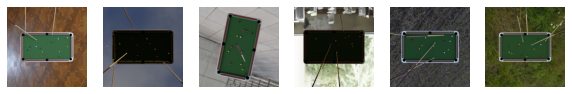

In [4]:
n = 6
plt.figure(figsize=(10, 8))
for i in tqdm(range(n)):
    scene.sample()
    scene.render(RENDER_PATH)
    
    plt.subplot(1, n, i + 1)
    plt.imshow(np.array(Image.open(RENDER_PATH).convert("RGB")))
    plt.axis("off")
    
    os.remove(RENDER_PATH)
plt.show()

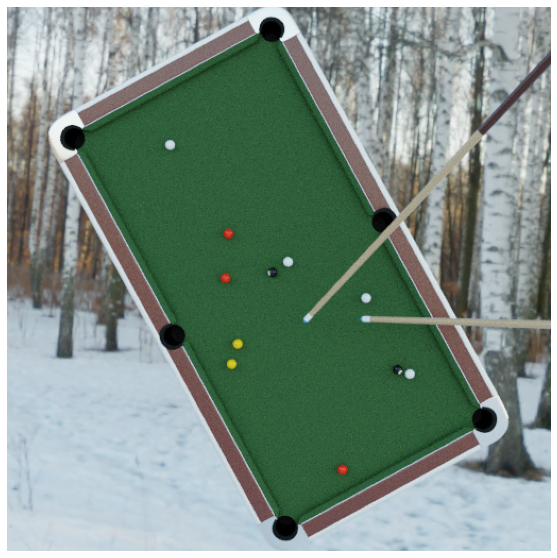

[24 balls] ndc_x ndc_y label
250 249 0
252 99 0
348 394 0
171 104 0
367 341 0
182 141 0
211 368 1
379 345 1
153 129 1
260 201 1
264 239 1
337 273 1
149 178 2
260 139 2
251 439 2
211 336 2
284 199 2
217 317 2
281 264 3
205 255 3
208 213 3
273 391 3
315 435 3
326 195 3

[6 cues] ndc_x ndc_y dir_x dir_y
127 257 0.9994019269943237 0.03457892686128616
169 317 0.9997014999389648 -0.024433160200715065
279 296 -0.6821807622909546 0.7311835289001465
224 196 -0.915197491645813 0.40300580859184265
147 96 0.6533088088035583 0.7570915818214417
332 293 -0.9995338320732117 -0.030530041083693504

[4 mask] ndc_x ndc_y
65 130
257 484
445 381
253 27



In [5]:
plt.figure(figsize=(10, 10))

scene.sample()
scene.render(RENDER_PATH)
scene.register(DATA_PATH)
    
plt.imshow(np.array(Image.open(RENDER_PATH).convert("RGB")))
plt.axis("off")
plt.show()

with open(DATA_PATH, "r") as f:
    print(f.read())

os.remove(RENDER_PATH)
os.remove(DATA_PATH)